# Proyecto Final: Talento TECH 2024 
## **Jhon Fredy Hernández Martínez**

# EVALUACIÓN Y CLASIFICACIÓN DE RIESGO CREDITICIO 

En este proyecto, se emplearon diversos algoritmos de machine learning para abordar la tarea de clasificación del riesgo crediticio utilizando datos crediticios de Alemania. se evaluaron cuatro módelos: árboles de decisión, bosques aleatorios, regresión logística y máquinas de vectores de soporte (SVM). Los resultados mostraron que, si bien los modelos de árboles de decisión y bosques aleatorios proporcionaron cierta capacidad predictiva con precisiones del 62% y 64.5% respectivamente, exhibieron limitaciones en la correcta clasificación de los casos. La regresión logística mejoró significativamente la precisión alcanzando un 70.5%, aunque aún presentó dificultades para predecir con precisión las clases de riesgo. Por último, las SVM destacaron como el modelo más efectivo con una precisión del 72%, demostrando una mayor capacidad para distinguir entre las clases de riesgo y capturar patrones más complejos en los datos. Estos resultados respaldan la elección de las SVM como la herramienta más eficaz para la evaluación del riesgo crediticio en este contexto financiero.

Fuente de datos: kaggle

https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk

### 1. Se importan Librerias 

In [ ]:
# Librerias
import pandas as pd # Manejo de DataFrame
import matplotlib.pyplot as plt # Libreria gráfica
import seaborn as sns # Libreria gráfica
import numpy as np # Libreria de algebra lineal
import pylab as pl # Módulo que proporciona un espacio de nombres similar a Matlab
from sklearn import metrics # Validar nuestro metodo
from sklearn.model_selection import train_test_split # Entrenar y divir la información
from sklearn.tree import DecisionTreeClassifier # Arboles de decisión
from sklearn.ensemble import RandomForestClassifier # Bosques aleatorios
from sklearn.linear_model import LogisticRegression # Regresión logistica
from sklearn.svm import SVC # Máquinas de vectores de soporte
import matplotlib.pyplot as plt
import seaborn as sns

##  2. Se carga el dataset

In [4]:
#Lectura el dataset
credit_risk = pd.read_csv(r'C:\Users\macb2\Dropbox\PC (2)\Downloads\Credit_Risk\credit_data.csv')

In [5]:
# Primeras 5 filas del dataset
credit_risk.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


## 3. Exploración de datos

In [6]:

# ¿Que columnas tienen los datos?
credit_risk.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [7]:
# ¿Que tamaño tiene el dataset?
credit_risk.shape

(1000, 11)

In [8]:
# ¿Hay datos nulos?
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [9]:
# ¿Como se distribuyen las variables númericas?
credit_risk.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [10]:

# ¿Como se comportan las variables categoricas?
credit_risk.describe(include="O")

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


In [12]:
#Verificamos el tipo de datos
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


### 3.1 Procesamiento de los datos

In [13]:
# Renombramos las columnas
credit_risk = credit_risk.rename(columns={"Age":"Edad",
                                          "Sex":"Género",
                                          "Job":"Trabajo",
                                          "Housing":"Alojamiento",
                                          "Saving accounts":"Cuentas de ahorro",
                                          "Checking account":"Cuenta de cheques",
                                          "Credit amount":"Monto de crédito",
                                          "Duration":"Duración",
                                          "Purpose":"Propósito",
                                          "Risk":"Riesgo"})
     

In [14]:
# Observamos el cambio de nombres de las columnas
credit_risk.columns
     

Index(['Unnamed: 0', 'Edad', 'Género', 'Trabajo', 'Alojamiento',
       'Cuentas de ahorro', 'Cuenta de cheques', 'Monto de crédito',
       'Duración', 'Propósito', 'Riesgo'],
      dtype='object')

In [15]:

# Procedemos a eliminar una columna
credit_risk = credit_risk.drop(["Unnamed: 0"], axis=1)

### 3.2 Análisis de Histograma de variables númericas

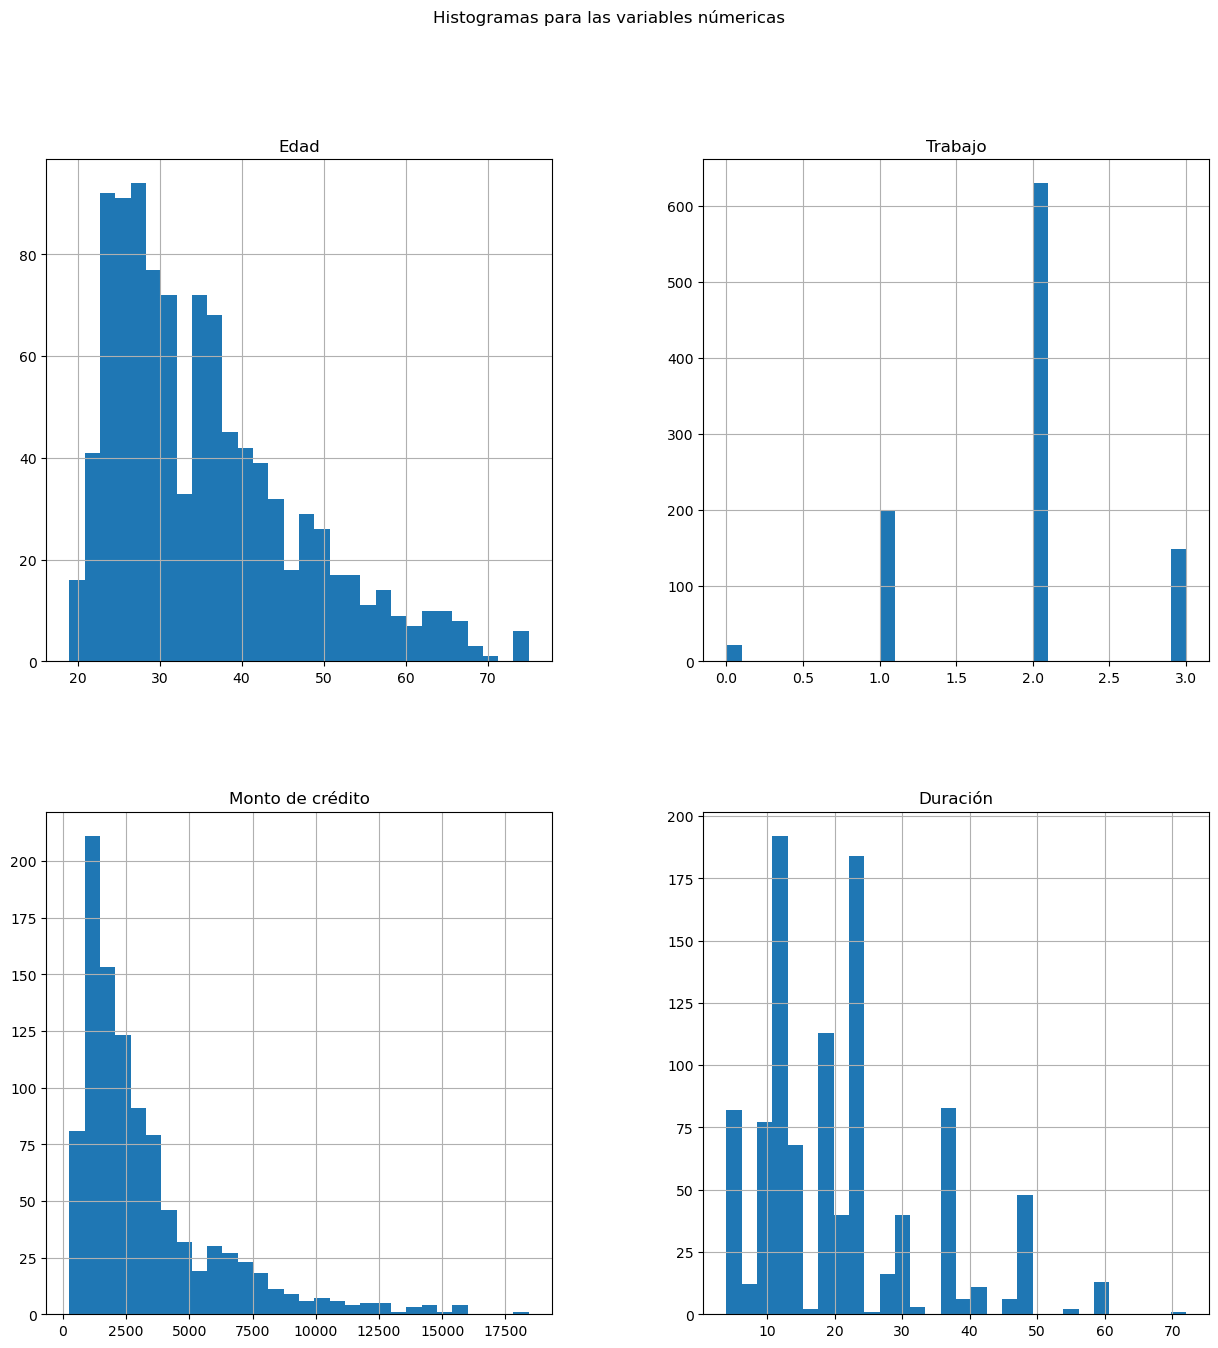

In [16]:
credit_risk.drop(['Género', 'Alojamiento', 'Cuentas de ahorro', 'Cuenta de cheques', 'Propósito', 'Riesgo'],axis=1).hist(bins=30, figsize=(15,15))
pl.suptitle("Histogramas para las variables númericas")
plt.show()

### 3.3 Análisis del riesgo

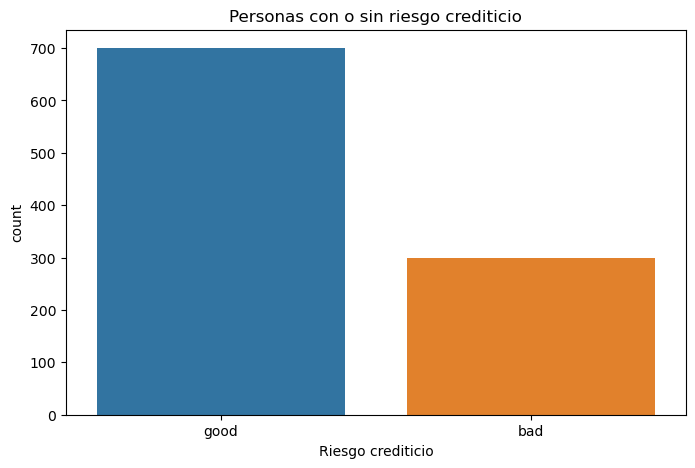

In [18]:
# Gráfica de riesgo crediticio
plt.figure(figsize=(8,5))
sns.countplot(data=credit_risk, x='Riesgo')
plt.title("Personas con o sin riesgo crediticio")
plt.xlabel("Riesgo crediticio")
plt.show()


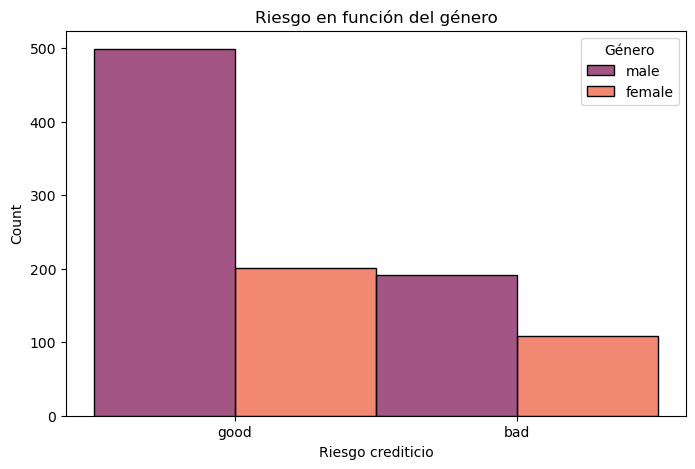

In [20]:
# Riesgo en función del género
plt.figure(figsize=(8,5))
sns.histplot(data = credit_risk, x = "Riesgo", 
             hue = "Género", palette = "rocket", multiple = "dodge")
plt.title("Riesgo en función del género")
plt.xlabel("Riesgo crediticio")
plt.show()

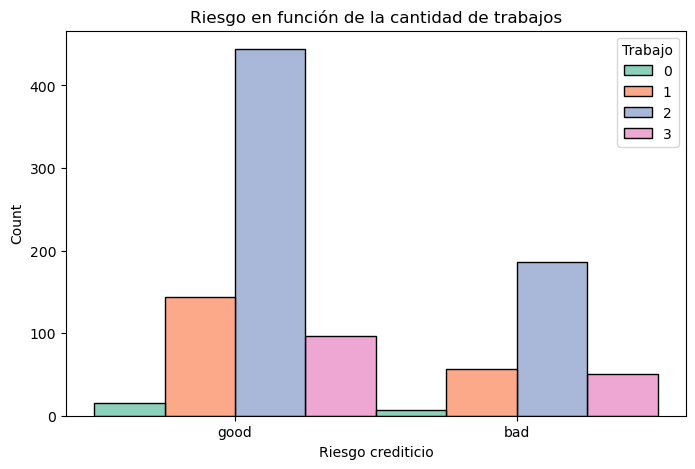

In [21]:
# Riesgo en función de la cantidad de trabajos
plt.figure(figsize=(8,5))
sns.histplot(data = credit_risk, x = "Riesgo", 
             hue = "Trabajo", palette = "Set2", multiple = "dodge")
plt.title("Riesgo en función de la cantidad de trabajos")
plt.xlabel("Riesgo crediticio")
plt.show()

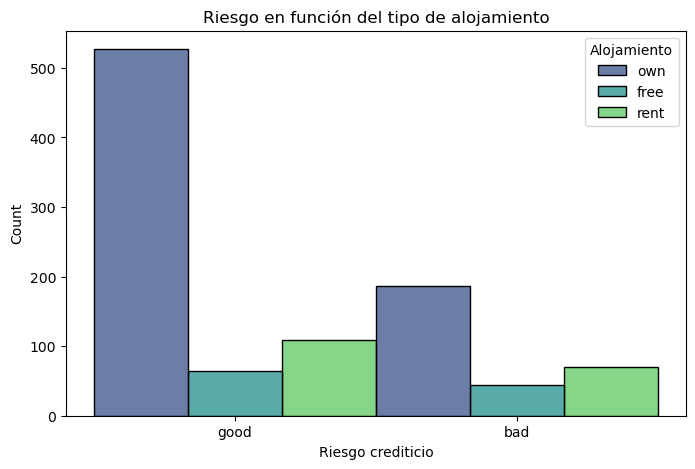

In [22]:
# Riesgo en función del tipo de alojamiento
plt.figure(figsize=(8,5))
sns.histplot(data = credit_risk, x = "Riesgo", 
             hue = "Alojamiento", palette = "viridis", multiple = "dodge")
plt.title("Riesgo en función del tipo de alojamiento")
plt.xlabel("Riesgo crediticio")
plt.show()

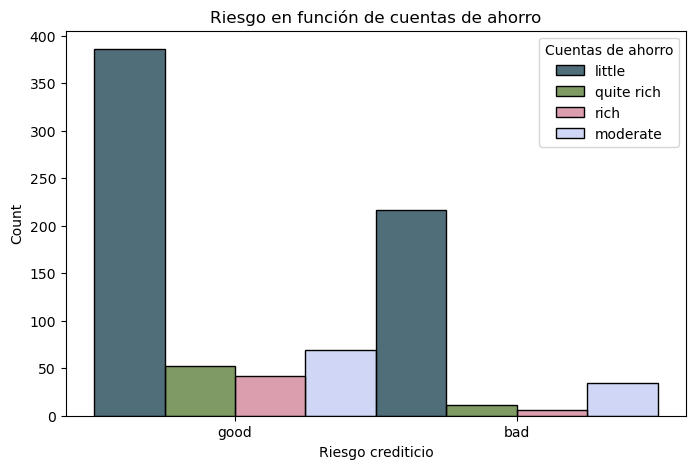

In [23]:
# Riesgo en función de cuentas de ahorro
plt.figure(figsize=(8,5))
sns.histplot(data = credit_risk, x = "Riesgo", 
             hue = "Cuentas de ahorro", palette = "cubehelix", multiple = "dodge")
plt.title("Riesgo en función de cuentas de ahorro")
plt.xlabel("Riesgo crediticio")
plt.show()

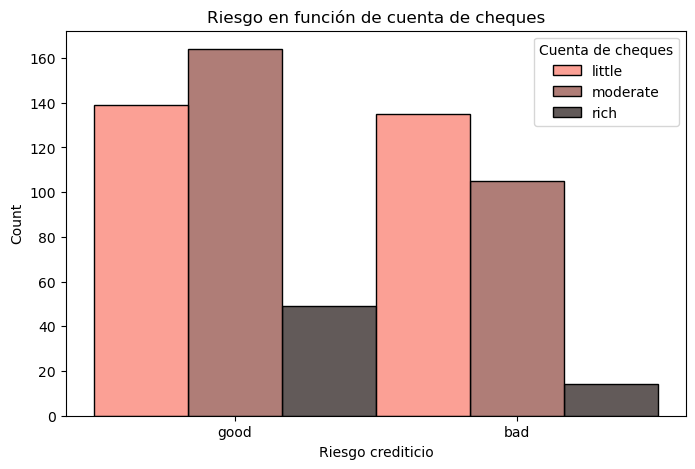

In [24]:
# Riesgo en función de cuenta de cheques
plt.figure(figsize=(8,5))
sns.histplot(data = credit_risk, x = "Riesgo", 
             hue = "Cuenta de cheques", palette = "dark:salmon_r", multiple = "dodge")
plt.title("Riesgo en función de cuenta de cheques")
plt.xlabel("Riesgo crediticio")
plt.show()

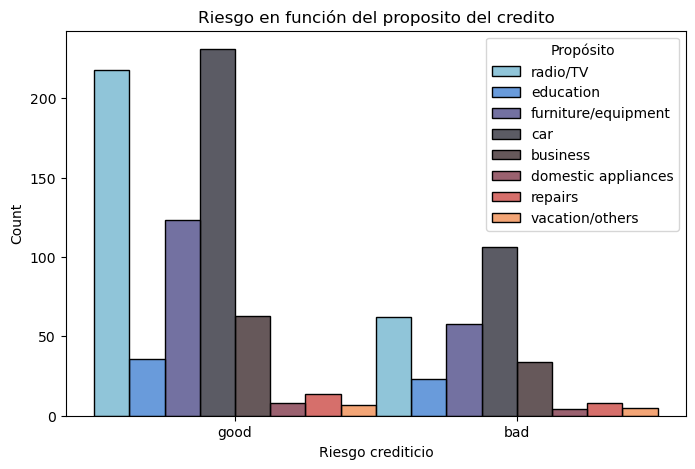

In [25]:
# Riesgo en función del proposito del credito
plt.figure(figsize=(8,5))
sns.histplot(data = credit_risk, x = "Riesgo", 
             hue = "Propósito", palette = "icefire", multiple = "dodge")
plt.title("Riesgo en función del proposito del credito")
plt.xlabel("Riesgo crediticio")
plt.show()
     

In [26]:
#Verificamos el tipo de datos
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Edad               1000 non-null   int64 
 1   Género             1000 non-null   object
 2   Trabajo            1000 non-null   int64 
 3   Alojamiento        1000 non-null   object
 4   Cuentas de ahorro  817 non-null    object
 5   Cuenta de cheques  606 non-null    object
 6   Monto de crédito   1000 non-null   int64 
 7   Duración           1000 non-null   int64 
 8   Propósito          1000 non-null   object
 9   Riesgo             1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


## 4. Tratamiento de los datos para modelación

In [27]:

# Observamos los valores unicos de las variables
print("Edad: ", credit_risk['Edad'].unique())
print("Género: ", credit_risk["Género"].unique())
print("Trabajo: ",credit_risk["Trabajo"].unique())
print("Alojamiento: ",credit_risk["Alojamiento"].unique())
print("Cuentas de ahorro: ",credit_risk["Cuentas de ahorro"].unique())
print("Cuenta de cheques: ",credit_risk["Cuenta de cheques"].unique())
print("Duración: ",credit_risk["Duración"].unique())
print("Propósito: ",credit_risk["Propósito"].unique())
print("Riesgo: ",credit_risk["Riesgo"].unique())

Edad:  [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
Género:  ['male' 'female']
Trabajo:  [2 1 3 0]
Alojamiento:  ['own' 'free' 'rent']
Cuentas de ahorro:  [nan 'little' 'quite rich' 'rich' 'moderate']
Cuenta de cheques:  ['little' 'moderate' nan 'rich']
Duración:  [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
Propósito:  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Riesgo:  ['good' 'bad']


In [28]:
# Convertimos riesgo  en una variable tipo dummy
credit_risk["Riesgo"] = credit_risk.Riesgo.map({"bad":0,
                                                "good":1})

In [29]:
# Terminamos de convertir el resto de variables categoricas a dummy 
credit_risk = credit_risk.merge(pd.get_dummies(credit_risk["Género"], drop_first=True, prefix="Género"), left_index=True, right_index=True)
credit_risk = credit_risk.merge(pd.get_dummies(credit_risk["Alojamiento"], drop_first=True, prefix="Alojamiento"), left_index=True, right_index=True)
credit_risk = credit_risk.merge(pd.get_dummies(credit_risk["Cuentas de ahorro"], drop_first=True, prefix="Cuentas de ahorro"), left_index=True, right_index=True)
credit_risk = credit_risk.merge(pd.get_dummies(credit_risk["Cuenta de cheques"], drop_first=True, prefix="Cuenta de cheques"), left_index=True, right_index=True)
credit_risk = credit_risk.merge(pd.get_dummies(credit_risk["Propósito"], drop_first=True, prefix = "Propósito"),left_index=True, right_index=True)

     

In [30]:
# Observamos las variables
credit_risk.head()

,Edad,Género,Trabajo,Alojamiento,Cuentas de ahorro,Cuenta de cheques,Monto de crédito,Duración,Propósito,Riesgo,...,Cuentas de ahorro_rich,Cuenta de cheques_moderate,Cuenta de cheques_rich,Propósito_car,Propósito_domestic appliances,Propósito_education,Propósito_furniture/equipment,Propósito_radio/TV,Propósito_repairs,Propósito_vacation/others
0,67,male,2,own,NaN,little,1169,6,radio/TV,1,...,0,0,0,0,0,0,0,1,0,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,0,...,0,1,0,0,0,0,0,1,0,0
2,49,male,1,own,little,NaN,2096,12,education,1,...,0,0,0,0,0,1,0,0,0,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1,...,0,0,0,0,0,0,1,0,0,0
4,53,male,2,free,little,little,4870,24,car,0,...,0,0,0,1,0,0,0,0,0,0


In [31]:

# Eliminamos las variables categoricas
credit_risk = credit_risk.drop(["Género",
                                "Alojamiento",
                                "Cuentas de ahorro",
                                "Cuenta de cheques",
                                "Propósito"], axis = 1)

In [32]:
# Obtenemos la información nuevamente de nuestras variables
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Edad                           1000 non-null   int64
 1   Trabajo                        1000 non-null   int64
 2   Monto de crédito               1000 non-null   int64
 3   Duración                       1000 non-null   int64
 4   Riesgo                         1000 non-null   int64
 5   Género_male                    1000 non-null   uint8
 6   Alojamiento_own                1000 non-null   uint8
 7   Alojamiento_rent               1000 non-null   uint8
 8   Cuentas de ahorro_moderate     1000 non-null   uint8
 9   Cuentas de ahorro_quite rich   1000 non-null   uint8
 10  Cuentas de ahorro_rich         1000 non-null   uint8
 11  Cuenta de cheques_moderate     1000 non-null   uint8
 12  Cuenta de cheques_rich         1000 non-null   uint8
 13  Propósito_car      

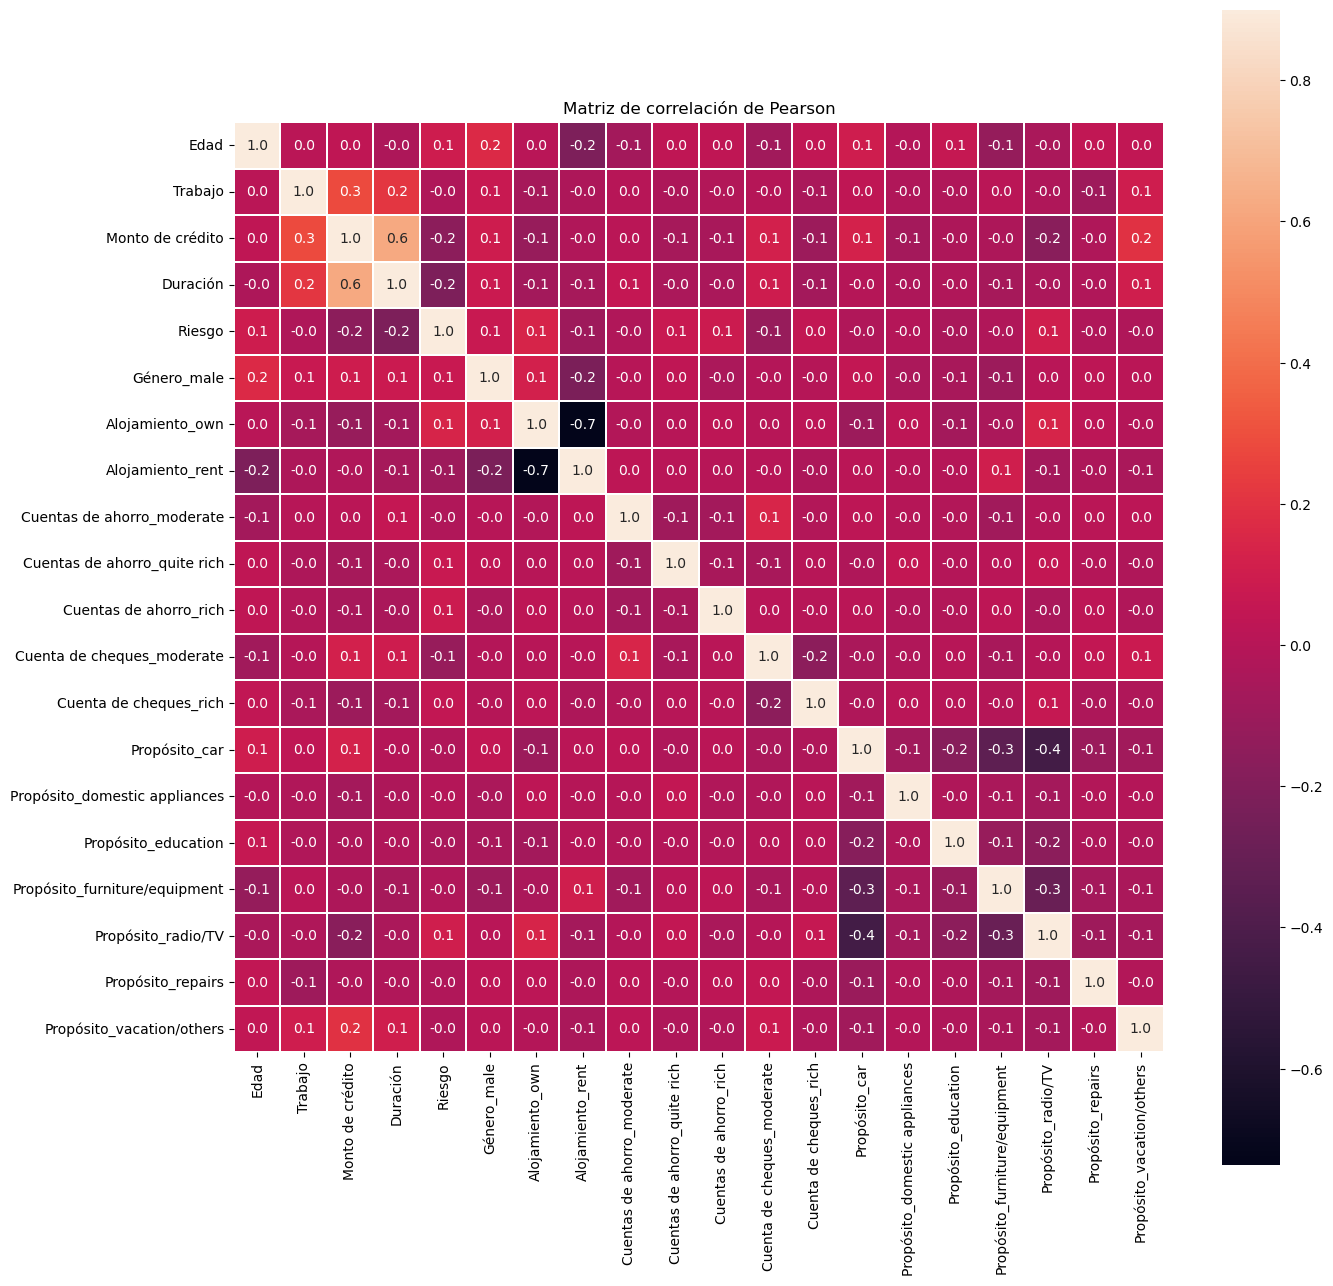

In [33]:
# Gráfica de matriz de correlación
plt.figure(figsize=(15,15))
sns.heatmap(credit_risk.corr(),annot=True, linewidths=.3, fmt= '.1f', vmax = 0.9, square= True)
plt.title("Matriz de correlación de Pearson")
plt.show()

## 5. Modelos de clasificación con scikit-learn

En esta sección  se crean 4 algoritmos de clasificación con la libreria scikit-learn como lo son arboles de decisión, bosques aleatorios, regresión logística y máquinas de vectores de soporte.

In [69]:
# Creamos nuestra varible dependiente y independientes
X = credit_risk.drop(["Riesgo"],axis=1) # Varibles independientes o explicativas
Y = credit_risk["Riesgo"] # Variable dependiente riesgo crediticio

In [70]:
# Dividimos nuestros datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 0)

### 5.1 Arboles de decisión

In [71]:
# Procedemos a aplicar nuestro algoritmo
arbol_decisión = DecisionTreeClassifier(criterion= "entropy")
arbol_decisión.fit(X_train, y_train) # Ejecución del modelo
Y_pred_arbol = arbol_decisión.predict(X_test)

In [72]:
# Creamos la matriz de confusión 
matriz_arbol = metrics.confusion_matrix(y_test, Y_pred_arbol)
matriz_arbol

array([[ 20,  38],
       [ 38, 104]], dtype=int64)

In [73]:

# Exactitud del modelo
print("Exactitud", metrics.accuracy_score(y_test, Y_pred_arbol))

Exactitud 0.62


### 5.2 Random Forest

In [74]:
# Procedemos a aplicar nuestro algoritmo
bosques_aleatorios = RandomForestClassifier(n_estimators=10, criterion="entropy")
bosques_aleatorios.fit(X_train, y_train) # Ejecución del modelo
Y_pred_bosques = bosques_aleatorios.predict(X_test)

In [75]:
# Creamos la matriz de confusión 
matriz_bosques = metrics.confusion_matrix(y_test, Y_pred_bosques)
matriz_bosques

array([[ 19,  39],
       [ 32, 110]], dtype=int64)

In [76]:
# Exactitud del modelo
print("Exactitud", metrics.accuracy_score(y_test, Y_pred_bosques))

Exactitud 0.645


### 5.3 Regresión logística

In [77]:
# Procedemos aplicar nuestro algoritmo
logreg = LogisticRegression()
logreg.fit(X_train, y_train) # Ejecución del modelo
Y_pred_log = logreg.predict(X_test)

C:\Users\macb2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
# Creamos una matriz de confusión
matriz_log = metrics.confusion_matrix(y_test, Y_pred_log)
matriz_log

array([[ 11,  47],
       [ 12, 130]], dtype=int64)

In [79]:

# Exactitud del modelo
print("Exactitud", metrics.accuracy_score(y_test, Y_pred_log))

Exactitud 0.705


### 5.4 Máquinas de vectores de soporte

In [80]:
# Procedemos aplicar nuestro algoritmo
vcs = SVC(kernel="linear")
vcs.fit(X_train, y_train) # Ejecución del modelo
Y_pred_vcs = vcs.predict(X_test)
     

In [81]:
# Creamos una matriz de confusión
matriz_vcs = metrics.confusion_matrix(y_test, Y_pred_vcs)
matriz_vcs

array([[  8,  50],
       [  6, 136]], dtype=int64)

In [82]:
# Exactitud del modelo
print("Exactitud", metrics.accuracy_score(y_test, Y_pred_vcs))

Exactitud 0.72


# Comparación de los modelos

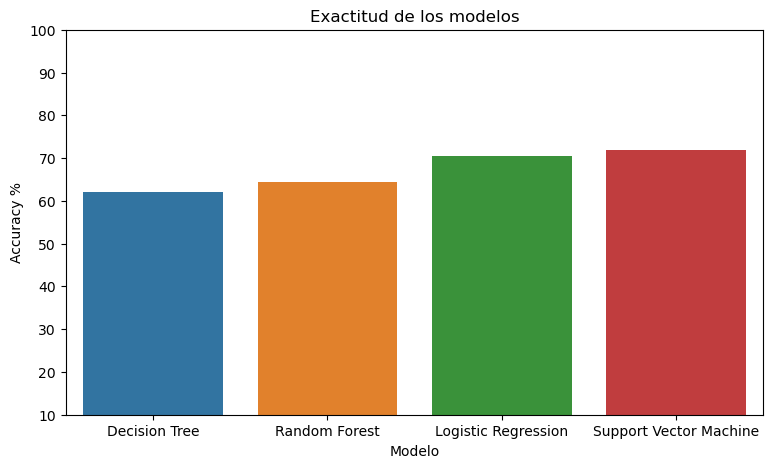

In [86]:
plt.figure(figsize=(9,5))

# Calculamos la exactitud de cada modelo
acc = [metrics.accuracy_score(Y_pred_arbol,y_test),metrics.accuracy_score(Y_pred_bosques,y_test), metrics.accuracy_score(Y_pred_log,y_test), metrics.accuracy_score(Y_pred_vcs,y_test)]

# Lista de modelos
models = ["Decision Tree", "Random Forest", "Logistic Regression", "Support Vector Machine"]

# Convertimos las exactitudes a porcentaje
acc_ = np.array(acc)*100

# Creamos el gráfico de barras
sns.barplot(x=models, y=acc_)

plt.title("Exactitud de los modelos")
plt.ylim([10,100])  # Cambié xlim a ylim porque estamos usando los modelos en el eje x
plt.ylabel("Accuracy %")
plt.xlabel("Modelo")
plt.show()


## 6. Conclusiones



Los árboles de decisión lograron una exactitud del 62%. La matriz de confusión muestra que el modelo clasificó correctamente a 20 observaciones como verdaderos negativos (TN) y a 104 observaciones como verdaderos positivos (TP). Sin embargo, también clasificó erróneamente a 38 observaciones como falsos positivos (FP) y a 38 observaciones como falsos negativos (FN).

Los bosques aleatorios obtuvieron una exactitud del 64.5%. La matriz de confusión muestra que el modelo clasificó correctamente a 19 observaciones como verdaderos negativos (TN) y a 110 observaciones como verdaderos positivos (TP). Sin embargo, también clasificó erróneamente a 39 observaciones como falsos positivos (FP) y a 32 observaciones como falsos negativos (FN).

La regresión logística alcanzó una exactitud del 70.5%. La matriz de confusión muestra que el modelo clasificó correctamente a 11 observaciones como verdaderos negativos (TN) y a 130 observaciones como verdaderos positivos (TP). Sin embargo, también clasificó erróneamente a 47 observaciones como falsos positivos (FP) y a 12 observaciones como falsos negativos (FN).

Las máquinas de vectores de soporte (SVM) obtuvieron la mayor exactitud con un 72%. La matriz de confusión muestra que el modelo clasificó correctamente a 8 observaciones como verdaderos negativos (TN) y a 136 observaciones como verdaderos positivos (TP). Sin embargo, también clasificó erróneamente a 50 observaciones como falsos positivos (FP) y a 6 observaciones como falsos negativos (FN).

En conclusión, el modelo de Máquinas de Vectores de Soporte (SVM) demostró ser el más preciso entre los cuatro modelos evaluados, con una exactitud del 72%. Sin embargo, es importante considerar otros factores además de la exactitud, como el equilibrio entre los falsos positivos y los falsos negativos, para evaluar completamente el rendimiento de cada modelo.


Con repecto al análisis del riesgo crediticio, gráficamente podemos apreciar una fuerte correlación entre la edad y monto del crédito. Con respecto al género los hombres son los que piden mas credítos. Tambien podemos observar que los datos de las personas con estatus económico alto se correlacionan con un buen crédito. Además, el número de credítos mas alto es para la adquisición de un carro.

Con respecto a la precisión de nuestros modelos estos estan entre un 62% a 72%. Esto puede deberse a los datos faltantes en cuentas de ahorro y cheques, además de la falta de variables socioeconómicas como lo son el ingreso, número de personas en su hogar, etc. Igualmente, el número de datos no es suficiente para lograr una clasificación de riesgo mas adecuada.